In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Implement dataset

In [51]:
np.random.seed(4)

In [52]:
x = np.random.uniform(0, 1, 50) # 50 data points using uniform distribution
x[:5]

array([0.96702984, 0.54723225, 0.97268436, 0.71481599, 0.69772882])

In [53]:
# Remember: In reality we don't have this function
def f(x):
    return 3*x + 2

In [54]:
t = f(x)
t[:5]

array([4.90108952, 3.64169675, 4.91805308, 4.14444798, 4.09318647])

In [55]:
noise = np.random.normal(0, 0.5, size=x.shape[0])
# Reality target values have noises

t = t + noise
t[:5]

array([4.76298784, 4.0399527 , 4.34615379, 4.39940787, 3.41945633])

## Visualization

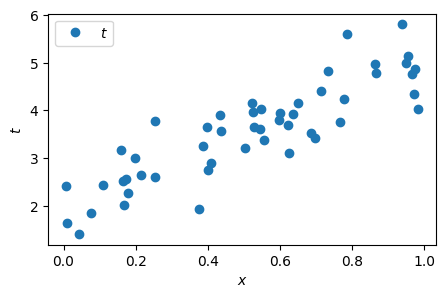

In [56]:
# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
# plt.plot([0, 1], [f(0), f(1)], 'r--', label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

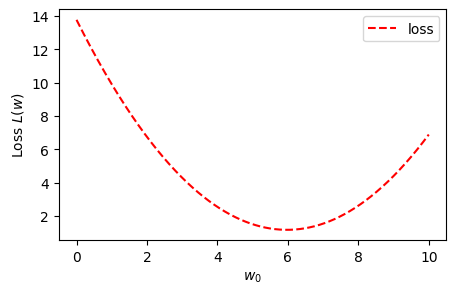

In [64]:
# Plot the loss versus different weight values of w_0

w_s = np.linspace(0, 10, num=1000) # weight values
losses = np.array([loss(model(x, w_0), t) for w_0 in w_s]) # Run the loss and model definition below 

plt.figure(figsize=(5,3))
plt.plot(w_s, losses, 'r--', label='loss')
plt.xlabel('$w_0$')
plt.ylabel('Loss $L(w)$')
plt.legend()
plt.show()

\begin{equation}
L(w) = \frac{1}{N} \sum_{i=1}^N (t_i - w_{0}x^{(i)})^2 = \frac{1}{N}\sum_{i=1}^N L_i
\end{equation}

\begin{equation}
\frac{dL}{dw_{0}} = \frac{1}{N}\sum_{i=1}^N 2(w_{0}x^{(i)}-t^{(i)})x^{(i)}
\end{equation}

# 2. Define the gradient descent function

### 2.1 Define model - w_0 * x

In [57]:
def model(w_0, x):
    return w_0*x

### 2.2 Define loss function MSE

In [58]:
# def loss(w_0, x, t):
#     return np.mean((t - model(w_0, x))**2)

In [59]:
# Or basically
def loss (pred, t):
    return np.mean((t - pred)**2)

In [60]:
# This is the deriative of loss function
def gradient(w_0, t, x):
    return np.mean(2 * (model(w_0, x) - t)*x)

### 2.3 Define Gradient Descent algorithm
- learning rate alpha: 0.9
- Initialized random value w_0
- g't = L'(w_0)
- w_0(t+1) = w_0 - alpha * g't
- t = t + 1

In [61]:
# Learning rate alpha
alpha = 0.9 

# Init random value
w_0 = np.random.rand()

# Init condition: number of iteration
nb_of_iterations = 4

# Store w_0 and it respectively loss value (w_0 = 1 loss = 0.7 for instance)
w_loss = [(w_0, loss(model(w_0, x), t))]

for _ in range(nb_of_iterations):
    gt = gradient(w_0, t, x)
    w_0 = w_0 - alpha * gt
    w_loss.append((w_0, loss(model(w_0, x), t)))

In [62]:
w_loss

[(0.41903403455230037, np.float64(12.07161352616474)),
 (np.float64(3.9499776535256905), np.float64(2.620641090301609)),
 (np.float64(5.236938883879731), np.float64(1.3651146625864827)),
 (np.float64(5.706011570153871), np.float64(1.1983226608756936)),
 (np.float64(5.876979568115946), np.float64(1.1761649657283926))]

=> With w_0 = 5.876, we reach minimal loss = 1.17 
- This is the optimized w_0

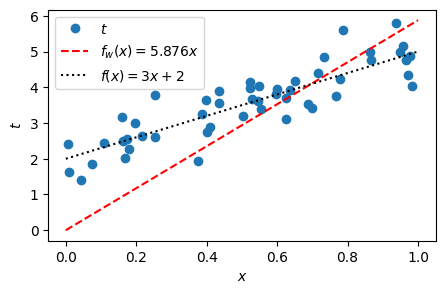

In [67]:
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')


# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x) = 5.876x$')

# Plot the target function
plt.plot([0, 1], [f(0), f(1)], 'k:',  label='$f(x) = 3x+2$')
plt.legend()
plt.show()

Why does the model (red line) still perform bad results?
- w_0x always pass through the origin, can't represent this dataset (Gradient_Descent.md - 2.4 Optimization)

# 3. Define a new model of the form

\begin{equation}
y = f_w(x) = w_0 + w_1x
\end{equation}

## 3.1 Gradient 

$$\nabla_w L(\mathbf{w}) = \begin{bmatrix} \frac{\partial L(\mathbf{w})}{\partial w_0} \\ \frac{\partial L(\mathbf{w})}{\partial w_1} \end{bmatrix} = \frac{2}{N} \begin{bmatrix} \sum_{i=1}^N ((w_0 + w_1 x^{(i)}) - t^{(i)}) \cdot 1 \\ \sum_{i=1}^N ((w_0 + w_1 x^{(i)}) - t^{(i)}) \cdot x^{(i)} \end{bmatrix} = \frac{2}{N} \mathbf{X}^T (\mathbf{X}\mathbf{w} - \mathbf{t})$$

In [80]:
# Re-arrange these data points into matrix
X = np.array((np.ones_like(x), x)).T
print(X.shape) # (n x d) format
X[:5]

(50, 2)


array([[1.        , 0.96702984],
       [1.        , 0.54723225],
       [1.        , 0.97268436],
       [1.        , 0.71481599],
       [1.        , 0.69772882]])

In [93]:
# Xw is matrix multiplication - using dot product
def new_model(w, X):
    return X @ w

In [104]:
# Gradient
def new_gradient(X, w, t):
    return 2*X.T @ (new_model(w, X) - t)

### Run gradient descent algorithm

In [105]:
# Init random w
np.random.seed(42)
w = np.random.randn(2) # normal distribution

# Init learning rate alpha
alpha = 0.01

losses = []
params = []

losses.append(loss(new_model(w, X), t))
params.append(w.copy())
print(f'Iter. 0:\t w[0]={w[0]:.4f} \t w[1]={w[1]:.4f} \t Loss: {losses[-1]:.4f}')
# Run GD for a number of steps
nb_iterations = 50
for i in range(nb_iterations):
    grad = new_gradient(X, w, t)
    w = w - alpha * grad
    losses.append(loss(new_model(w, X), t))
    params.append(w.copy())
    print(f'Iter. {i+1}:\t w[0]={w[0]:.4f} \t w[1]={w[1]:.4f} \t Loss: {losses[-1]:.4f}')
# Print


Iter. 0:	 w[0]=0.4967 	 w[1]=-0.1383 	 Loss: 10.9979
Iter. 1:	 w[0]=3.6405 	 w[1]=1.7624 	 Loss: 1.3651
Iter. 2:	 w[0]=2.6544 	 w[1]=1.3610 	 Loss: 0.5380
Iter. 3:	 w[0]=2.8626 	 w[1]=1.6130 	 Loss: 0.4446
Iter. 4:	 w[0]=2.7319 	 w[1]=1.6679 	 Loss: 0.4151
Iter. 5:	 w[0]=2.7034 	 w[1]=1.7713 	 Loss: 0.3936
Iter. 6:	 w[0]=2.6498 	 w[1]=1.8529 	 Loss: 0.3752
Iter. 7:	 w[0]=2.6074 	 w[1]=1.9335 	 Loss: 0.3592
Iter. 8:	 w[0]=2.5656 	 w[1]=2.0077 	 Loss: 0.3451
Iter. 9:	 w[0]=2.5271 	 w[1]=2.0774 	 Loss: 0.3329
Iter. 10:	 w[0]=2.4910 	 w[1]=2.1424 	 Loss: 0.3222
Iter. 11:	 w[0]=2.4572 	 w[1]=2.2032 	 Loss: 0.3128
Iter. 12:	 w[0]=2.4257 	 w[1]=2.2601 	 Loss: 0.3046
Iter. 13:	 w[0]=2.3962 	 w[1]=2.3132 	 Loss: 0.2975
Iter. 14:	 w[0]=2.3686 	 w[1]=2.3629 	 Loss: 0.2912
Iter. 15:	 w[0]=2.3428 	 w[1]=2.4094 	 Loss: 0.2858
Iter. 16:	 w[0]=2.3187 	 w[1]=2.4528 	 Loss: 0.2810
Iter. 17:	 w[0]=2.2962 	 w[1]=2.4934 	 Loss: 0.2768
Iter. 18:	 w[0]=2.2751 	 w[1]=2.5314 	 Loss: 0.2732
Iter. 19:	 w[0]=2.25

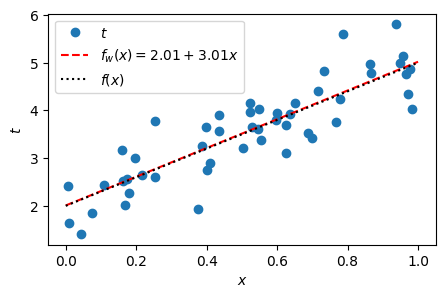

In [106]:
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')


# Plot our model
plt.plot([0, 1], [new_model(w, [[1,0]]), new_model(w, [[1,1]])], 'r--', label=f'$f_w(x)={w[0]:.2f} + {w[1]:.2f}x$')

# Plot the target function
plt.plot([0, 1], [f(0), f(1)], 'k:',  label='$f(x)$')
plt.legend()
plt.show()